In [1]:
*mkdir data
*mkdir figures

In [2]:
copy "https://studentaid.gov/sites/default/files/fsawg/datacenter/library/PortfolioSummary.xls" ///
data/PortfolioSummary.xls, replace

In [3]:
import excel using data/PortfolioSummary.xls, cellrange(I7:J56) clear

(2 vars, 50 obs)


In [4]:
rename I outstanding_b
rename J borrowers

In [5]:
gen quarter=_n-6 if _n>6

(6 missing values generated)


In [6]:
qui gen keep=1 if _n<7

forvalues q = 4(4)44 {
   qui replace keep=1 if quarter==`q'
}

In [7]:
keep if keep==1

(33 observations deleted)


In [8]:
gen year = 2006 + _n

In [9]:
qui { 
    gen cpi_factor=304.702/304.702 if year==2023
    replace cpi_factor= 292.655/ 304.702 if year==2022
    replace cpi_factor= 270.970/ 304.702 if year==2021
    replace cpi_factor= 258.811/ 304.702 if year==2020
    replace cpi_factor= 255.657/ 304.702 if year==2019
    replace cpi_factor= 251.107/ 304.702 if year==2018
    replace cpi_factor= 245.120/ 304.702 if year==2017
    replace cpi_factor= 240.007/ 304.702 if year==2016
    replace cpi_factor= 237.017/ 304.702 if year==2015
    replace cpi_factor= 236.736/ 304.702 if year==2014
    replace cpi_factor= 232.957/ 304.702 if year==2013
    replace cpi_factor= 229.594/ 304.702 if year==2012
    replace cpi_factor= 224.939/ 304.702 if year==2011
    replace cpi_factor= 218.056/ 304.702 if year==2010
    replace cpi_factor= 214.537/ 304.702 if year==2009
    replace cpi_factor= 215.303/ 304.702 if year==2008
    replace cpi_factor= 207.342/ 304.702 if year==2007
}

In [10]:
replace outstanding_b =outstanding_b / cpi_factor

(16 real changes made)


In [11]:
gen outstanding_t=outstanding_b / 1000

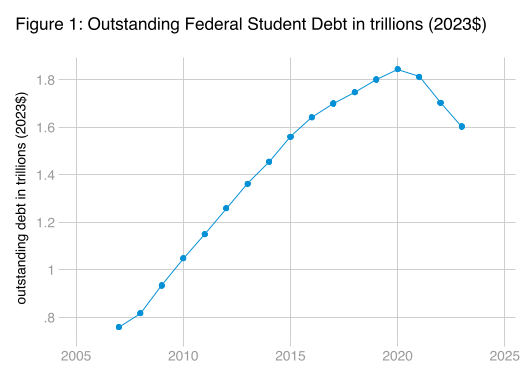

In [12]:
tw connect outstanding_t year, scheme(538w) ytitle(outstanding debt in trillions (2023$)) ///
    scale(1.4) xtitle("") ///
    title("Figure 1: Outstanding Federal Student Debt in trillions (2023$)" " ", span)

In [13]:
graph export figures/f1_outstanding_debt_2007_present.pdf, replace

file figures/f1_outstanding_debt_2007_present.pdf saved as PDF format


In [14]:
graph export figures/f1_outstanding_debt_2007_present.png, replace

(file figures/f1_outstanding_debt_2007_present.png not found)
file figures/f1_outstanding_debt_2007_present.png written in PNG format


In [15]:
list year outstanding_t, noobs clean


    year   outsta~t  
    2007   .7582942  
    2008   .8165843  
    2009   .9331221  
    2010   1.047738  
    2011    1.14897  
    2012   1.258388  
    2013   1.360556  
    2014   1.454161  
    2015   1.558625  
    2016   1.640518  
    2017   1.699156  
    2018   1.746376  
    2019   1.800035  
    2020   1.844028  
    2021    1.81121  
    2022   1.701783  
    2023   1.602197  
